<a href="https://colab.research.google.com/github/araldi/Python_for_biomedical_data_analysis/blob/main/Homework/Homework_part_06_07_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization homework

These data come from Gapminder Foundation (www.gapminder.org), an educational organization founded by Hans Rosling that debunks common myths about the developing world. Media often use sensationalistic narratives to describe health and economic trends in developing world, which often do not adhere to reality and generate misconceptions. Data-based trends actually depict a different story and appropriate data visualization is the key to convey effectively the truth to the lay public.

Let's look at some examples.

### Child mortality

For each of the six pairs of countries below, which country do you think had the highest child mortality rates in the 2010s decade? Which pairs do you think are most similar?

* Sri Lanka or Turkey
* Poland or South Korea
* Malaysia or Russia
* Pakistan or Vietnam
* Thailand or South Africa

Let's look at the actual data!

Your task is to compare the 10 nations, two by two as above, using a boxplot describing the distribution of child mortality in each country in the years 2010-2018 (2019 is not available yet).

Surprising?



In [ ]:
child_mortality_file = 'https://docs.google.com/spreadsheets/d/1Av7eps_zEK73-AdbFYEmtTrwFKlfruBYXdrnXAOFVpM/export?format=xlsx'

child_mortality_sheet = 'data-for-countries-etc-by-year'

# the file is an excel workbook and you need the sheet specified

# When you explore the file, you will notice that there is data until 2100!
# Data until 2018 is real, from 2019 until 2100 is a projection.

# more info here: https://docs.google.com/spreadsheets/d/1Av7eps_zEK73-AdbFYEmtTrwFKlfruBYXdrnXAOFVpM/edit#gid=501532268

# PS: Child mortality is expressed as Deaths/10.000 births

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_cm = pd.read_excel(child_mortality_file, child_mortality_sheet)


In [ ]:
df_cm.head()

,geo,name,time,Child mortality
0,afg,Afghanistan,1800.0,468.58
1,afg,Afghanistan,1801.0,468.58
2,afg,Afghanistan,1802.0,468.58
3,afg,Afghanistan,1803.0,468.58
4,afg,Afghanistan,1804.0,468.58


In [ ]:
countries = [["Sri Lanka" , 'Turkey'],[ 'Poland', 'South Korea'],[ 'Malaysia',
             'Russia'], ['Pakistan', 'Vietnam'], ['Thailand' , 'South Africa']]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f73835e6d50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f73839c2090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7383b88d50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f73839c25d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7382fa5590>],
 'means': []}

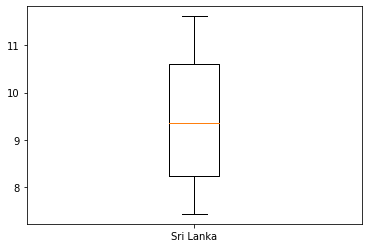

In [ ]:
  country = "Sri Lanka"
  df_by_country = df_cm[df_cm['name'] == country]
  df_by_country_2000 = df_by_country[df_by_country['time'].isin(range(2010, 2019))]
  plt.boxplot(df_by_country_2000['Child mortality'], labels = [country])

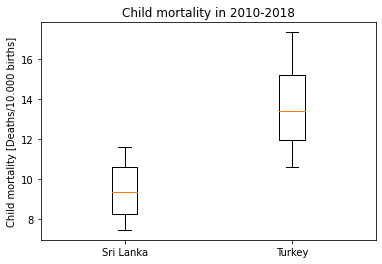

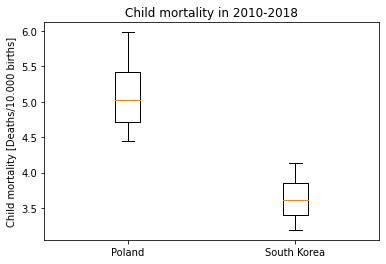

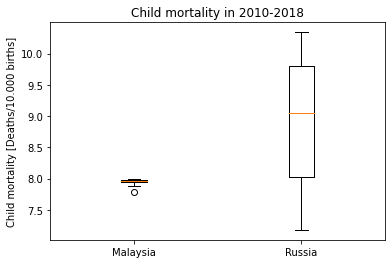

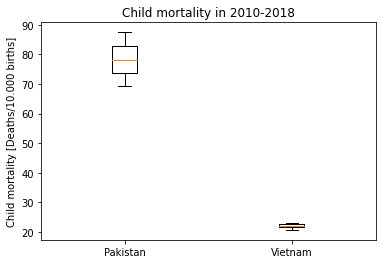

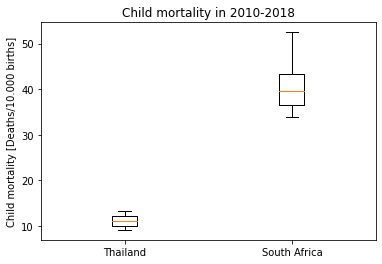

In [ ]:
# Let's look at the data first, then reset the y axis limit
for pair in countries:
  data = []
  for country in pair:
    df_by_country = df_cm[df_cm['name'] == country]
    df_by_country_2000 = df_by_country[df_by_country['time'].isin(range(2010, 2019))]
    data.append(df_by_country_2000['Child mortality'].values)
  plt.boxplot(data, labels = pair)
  plt.ylabel('Child mortality [Deaths/10.000 births]')
  plt.title('Child mortality in 2010-2018')
  plt.show()
  plt.close()

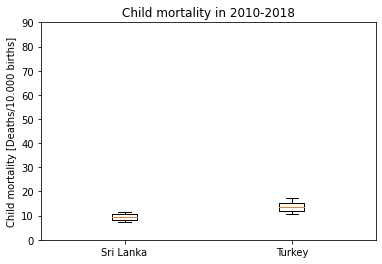

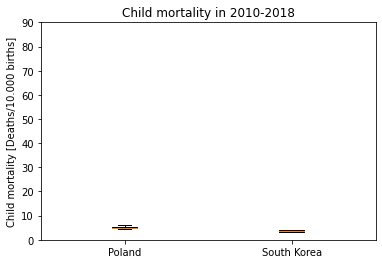

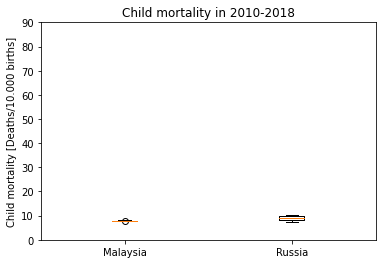

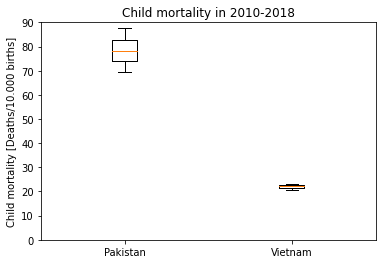

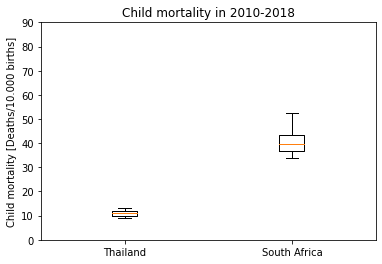

In [ ]:
# common y-axis range to have a better perspective
for pair in countries:
  data = []
  for country in pair:
    df_by_country = df_cm[df_cm['name'] == country]
    df_by_country_2000 = df_by_country[df_by_country['time'].isin(range(2010, 2019))]
    data.append(df_by_country_2000['Child mortality'].values)
  plt.boxplot(data, labels = pair)
  plt.ylabel('Child mortality [Deaths/10.000 births]')
  plt.title('Child mortality in 2010-2018')
  plt.ylim(0, 90)
  plt.show()
  plt.close()

Now, plot the child mortality rate from 1800 to 2018 (line plot) of the countries that in recent years (2008-2018) have the lowest child mortality.

> Indented block



In [ ]:
# to determine the 10 countries with the least child mortality, subset the df to the decades of interest

selected_decade = df_cm[df_cm['time'].isin(range(2008,2019))]

# and group them by nation, calculate the mean of child mortality,
# sort the countries by mortality, then select the first 10
selected_decade.groupby(by ='name').mean().sort_values(by ='Child mortality')

countries_least = selected_decade.groupby(by ='name').mean().sort_values(by ='Child mortality').index[0:10]
countries_least

Index(['Iceland', 'Hong Kong, China', 'San Marino', 'Finland', 'Singapore',
       'Luxembourg', 'Slovenia', 'Sweden', 'Norway', 'Japan'],
      dtype='object', name='name')

In [ ]:
# select the data only of the countries of interest, and of the decade of interest
selected_countries = df_cm[df_cm['name'].isin(countries_least)  & df_cm['time'].isin(range(1800,2019))]

Text(0.5, 1.0, 'Child mortality between 1800 and 2018')

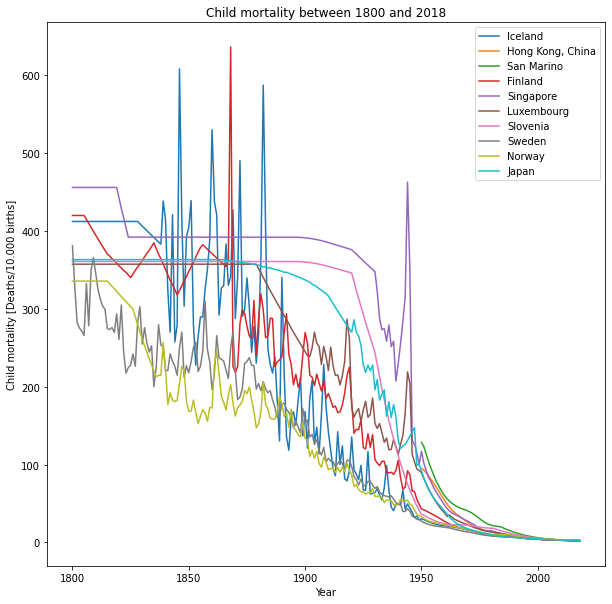

In [ ]:
plt.figure(figsize = (10,10))
for country in countries_least:
  subset = selected_countries[selected_countries['name'] == country]
  plt.plot(subset['time'], subset['Child mortality'], label =country)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Child mortality [Deaths/10.000 births]')
# plt.ylim(0, 600)
plt.title('Child mortality between 1800 and 2018')

Repeat the same analysis, but with the 10 countries with the most mortality in the decade 2008-2018.

In [ ]:
# to determine the 10 countries with the least child mortality, subset the df to the decades of interest

selected_decade = df_cm[df_cm['time'].isin(range(2008,2019))]

# and group them by nation, calculate the mean of child mortality,
# sort the countries by mortality, then select the first 10
countries_most = selected_decade.groupby(by ='name').mean().sort_values(by ='Child mortality', ascending =False).index[0:10]

# select the data only of the countries of interest, and of the decade of interest
selected_countries = df_cm[df_cm['name'].isin(countries_most)  & df_cm['time'].isin(range(1800,2019))]

Text(0.5, 1.0, 'Child mortality between 1800 and 2018')

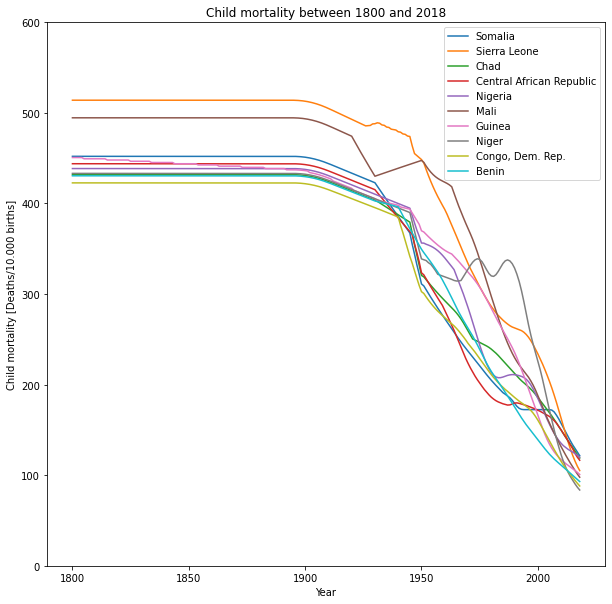

In [ ]:
plt.figure(figsize = (10,10))
for country in countries_most:
  subset = selected_countries[selected_countries['name'] == country]
  plt.plot(subset['time'], subset['Child mortality'], label =country)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Child mortality [Deaths/10.000 births]')
plt.ylim(0, 600)
plt.title('Child mortality between 1800 and 2018')

Can you plot the 2019-2100 projection of the 10 most and 10 least countries as above? What do you notice?

Since there are 20 countries to plot, it is a good idea to assign shades of colors, or different line size/markers for countries that belong to the same group (example: blues for the 10 least countries, and red for the 10 most countries).



Text(0.5, 1.0, 'Projected child mortality between 2019 and 2100')

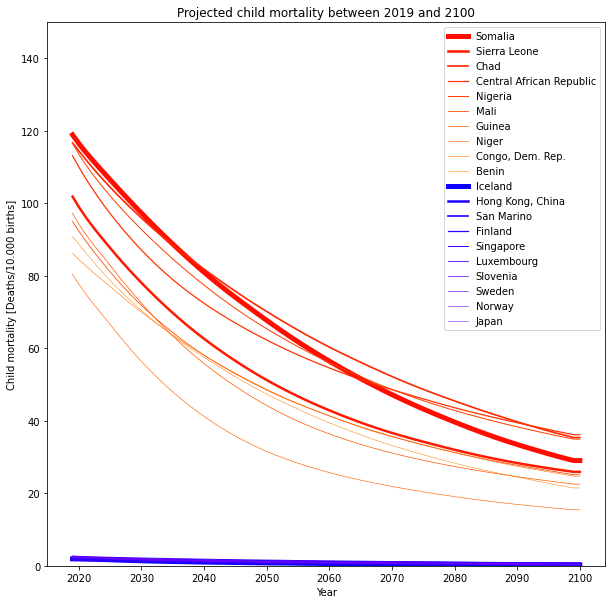

In [ ]:
countries = list(countries_most) + list(countries_least)
selected_countries = df_cm[df_cm['name'].isin(countries)  & df_cm['time'].isin(range(2019,2101))]

i = 1
j = 1
plt.figure(figsize = (10,10))
for country in countries:
  subset = selected_countries[selected_countries['name'] == country]
  if country in countries_most:
    color = (1, i / 20, 0, 1)
    l= 5/i
    i = i+ 1
  else:
    color = (j / 20, 0 , 1, 1)
    l= 5/j
    j = j+ 1
  plt.plot(subset['time'], subset['Child mortality'], label =country, c = color, linewidth= l )
plt.legend()
plt.xlabel('Year')
plt.ylabel('Child mortality [Deaths/10.000 births]')
plt.ylim(0, 150)
plt.title('Projected child mortality between 2019 and 2100')


How does child mortality correlate with income?

For the 20 countries above, plot child mortality vs income for the years 2008-2018 in a scatterplot.
Play around to make sure the countries are still distinguishable (marker types, marker size, color, etc).


In [ ]:
income_file = 'https://github.com/open-numbers/ddf--gapminder--systema_globalis/raw/master/countries-etc-datapoints/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv'

In [ ]:
income = pd.read_csv(income_file)

In [ ]:
income

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,683
1,afg,1801,683
2,afg,1802,683
3,afg,1803,683
4,afg,1804,683
...,...,...,...
48940,zwe,2046,5438
48941,zwe,2047,5555
48942,zwe,2048,5674
48943,zwe,2049,5797


In [ ]:
df_cm

,geo,name,time,Child mortality
0,afg,Afghanistan,1800.0,468.58
1,afg,Afghanistan,1801.0,468.58
2,afg,Afghanistan,1802.0,468.58
3,afg,Afghanistan,1803.0,468.58
4,afg,Afghanistan,1804.0,468.58
...,...,...,...,...
57492,zwe,Zimbabwe,2096.0,14.05
57493,zwe,Zimbabwe,2097.0,13.94
57494,zwe,Zimbabwe,2098.0,13.82
57495,zwe,Zimbabwe,2099.0,13.71


In [ ]:
combined = pd.merge(income, df_cm, on=['geo', 'time'])

In [ ]:
combined

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,name,Child mortality
0,afg,1800,683,Afghanistan,468.58
1,afg,1801,683,Afghanistan,468.58
2,afg,1802,683,Afghanistan,468.58
3,afg,1803,683,Afghanistan,468.58
4,afg,1804,683,Afghanistan,468.58
...,...,...,...,...,...
47440,zwe,2046,5438,Zimbabwe,26.07
47441,zwe,2047,5555,Zimbabwe,25.58
47442,zwe,2048,5674,Zimbabwe,25.11
47443,zwe,2049,5797,Zimbabwe,24.64


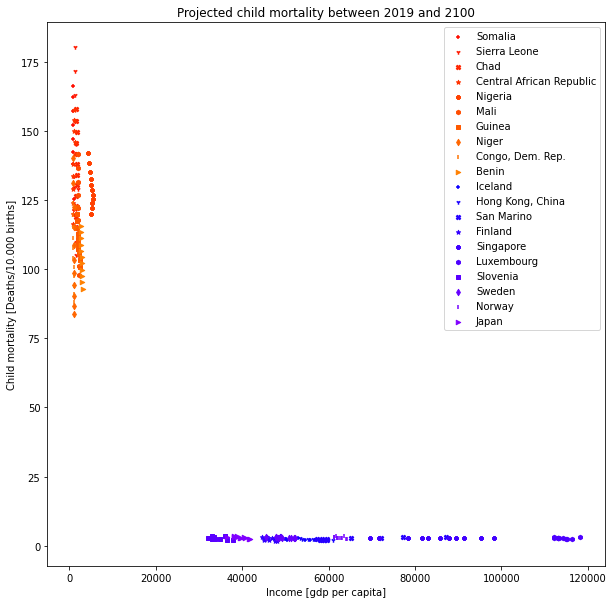

In [ ]:
markers = [".", 'v', '+', '1', 'X', '*', 'P', 'h', 's', 'd', '|',">"]

selected  = combined[combined['name'].isin(countries)  & combined['time'].isin(range(2008,2019))]
i = 1
j = 1
plt.figure(figsize = (10,10))
for country in countries:
  subset = selected[selected['name'] == country]
  if country in countries_most:
    color = (1, i / 20, 0, 1)
    i = i+ 1
    m = markers[i]
  else:
    color = (j / 20, 0 , 1, 1)
    j = j+ 1
    m = markers[j]
  plt.scatter(subset['income_per_person_gdppercapita_ppp_inflation_adjusted'],
              subset['Child mortality'], label =country,
              c = color, s= 20, marker = m)
plt.legend()
plt.xlabel('Income [gdp per capita]')
plt.ylabel('Child mortality [Deaths/10.000 births]')
# plt.ylim(0, 150)
plt.title('Projected child mortality between 2019 and 2100');

Do the same with 10 random countries.

In [ ]:
import random
random_countries = []
for i in range(10):
  c = random.choice(combined['name'].unique())
  random_countries.append(c)

In [ ]:
random_countries

['Monaco',
 'Equatorial Guinea',
 'Germany',
 'Timor-Leste',
 'Estonia',
 'Pakistan',
 'Madagascar',
 'Czech Republic',
 'Norway',
 'Kyrgyz Republic']

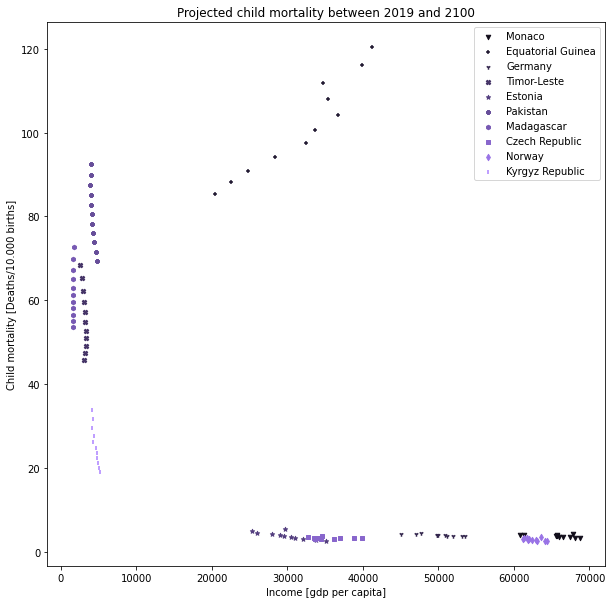

In [ ]:
markers = [".", 'v', '+', '1', 'X', '*', 'P', 'h', 's', 'd', '|']
selected  = combined[combined['name'].isin(random_countries)  & combined['time'].isin(range(2008,2019))]
i = 1
plt.figure(figsize = (10,10))
for country in random_countries:
  subset = selected[selected['name'] == country]
  color = (i / 15, i / 20, i / 10, 1)

  plt.scatter(subset['income_per_person_gdppercapita_ppp_inflation_adjusted'],
              subset['Child mortality'], label =country, c = color, s= 20, marker=markers[i])
  i = i+ 1
plt.legend()
plt.xlabel('Income [gdp per capita]')
plt.ylabel('Child mortality [Deaths/10.000 births]')
# plt.ylim(0, 150)
plt.title('Projected child mortality between 2019 and 2100');